# Guide on how to use the backtester

In [2]:
# Ensure the project root is in PATH.
import sys
sys.path.append("..")
# All imports of our code are relative to the project root.

from backtester.engine import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sys
import os

In [3]:
# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output


market_data_round_5_day_2 = pd.read_csv(os.path.join("..", "data", "round5", "prices_round_5_day_2.csv"), sep=";")
market_data_round_5_day_3 = pd.read_csv(os.path.join("..", "data", "round5", "prices_round_5_day_3.csv"), sep=";")
market_data_round_5_day_4 = pd.read_csv(os.path.join("..", "data", "round5", "prices_round_5_day_4.csv"), sep=";")

trades_round_5_day_2 = pd.read_csv(os.path.join("..", "data", "round5", "trades_round_5_day_2.csv"), sep=";")
trades_round_5_day_3 = pd.read_csv(os.path.join("..", "data", "round5", "trades_round_5_day_3.csv"), sep=";")
trades_round_5_day_4 = pd.read_csv(os.path.join("..", "data", "round5", "trades_round_5_day_4.csv"), sep=";")

observations_round_5_day_2 = pd.read_csv(os.path.join("..", "data", "round5", "observations_round_5_day_2.csv"), sep=",")
observations_round_5_day_3 = pd.read_csv(os.path.join("..", "data", "round5", "observations_round_5_day_3.csv"), sep=",")
observations_round_5_day_4 = pd.read_csv(os.path.join("..", "data", "round5", "observations_round_5_day_4.csv"), sep=",")

market_data_round_5_all3days = concatenate_historical_data([market_data_round_5_day_2, market_data_round_5_day_3, market_data_round_5_day_4])
trades_round_5_all3days = concatenate_historical_data([trades_round_5_day_2, trades_round_5_day_3, trades_round_5_day_4])
observations_round_5_all3days = concatenate_historical_data([observations_round_5_day_2, observations_round_5_day_3, observations_round_5_day_4])

olivia always buying at lowest and selling at highest

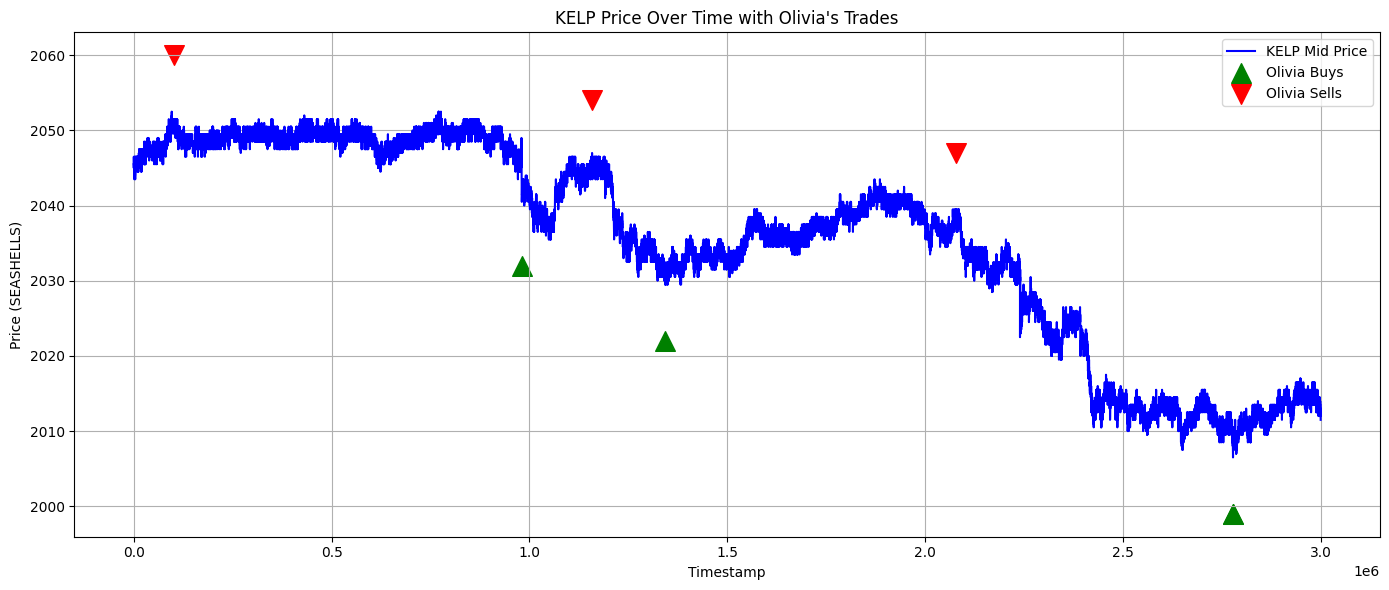

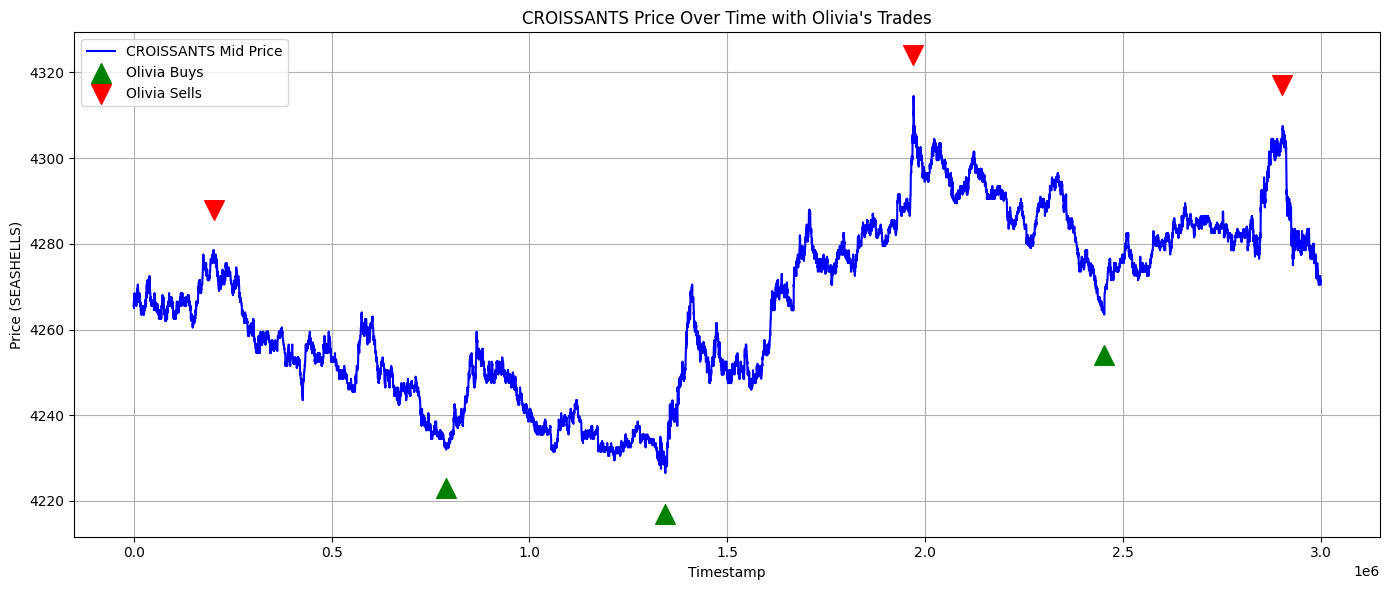

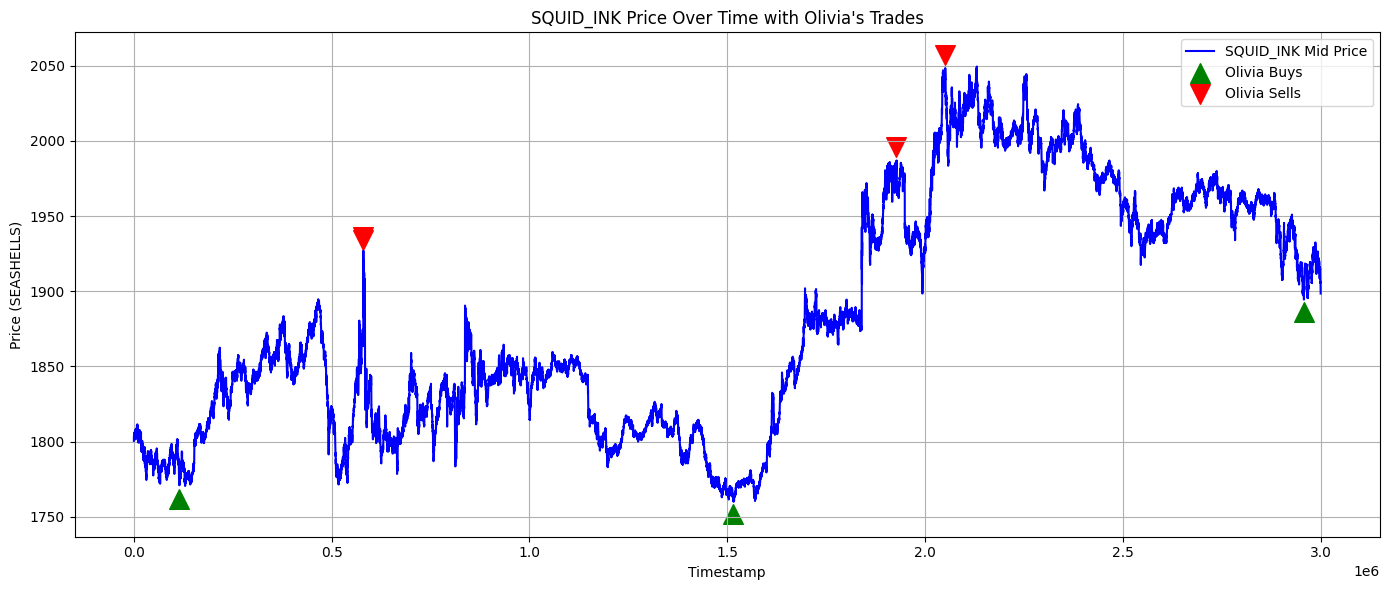

In [22]:
th = trades_round_5_all3days.copy()
md = market_data_round_5_all3days.copy()

import matplotlib.pyplot as plt
 
def plot_price_with_trader_trades(product: str, trader: str, md: pd.DataFrame, th: pd.DataFrame):
    # Filter market data for the selected product
    market = md[md["product"] == product]

    # Filter trader's trades for the selected product
    trader_trades = th[(th["symbol"] == product) & ((th["buyer"] == trader) | (th["seller"] == trader))]

    # Plot mid price over time
    plt.figure(figsize=(14, 6))
    plt.plot(market["timestamp"], market["mid_price"], label=f"{product} Mid Price", color="blue")

    # Mark trader's buys
    trader_buys = trader_trades[trader_trades["buyer"] == trader]
    plt.scatter(trader_buys["timestamp"], trader_buys["price"] - 10, color="green", label=f"{trader} Buys", marker="^", s=200)

    # Mark trader's sells
    trader_sells = trader_trades[trader_trades["seller"] == trader]
    plt.scatter(trader_sells["timestamp"], trader_sells["price"] +10, color="red", label=f"{trader} Sells", marker="v", s=200)

    # Final touches
    plt.title(f"{product} Price Over Time with {trader}'s Trades")
    plt.xlabel("Timestamp")
    plt.ylabel("Price (SEASHELLS)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_price_with_trader_trades("KELP", "Olivia", md, th)
plot_price_with_trader_trades("CROISSANTS", "Olivia", md, th)
plot_price_with_trader_trades("SQUID_INK", "Olivia", md, th)

# lets look at peter, who exclusviely trades volcanic rock

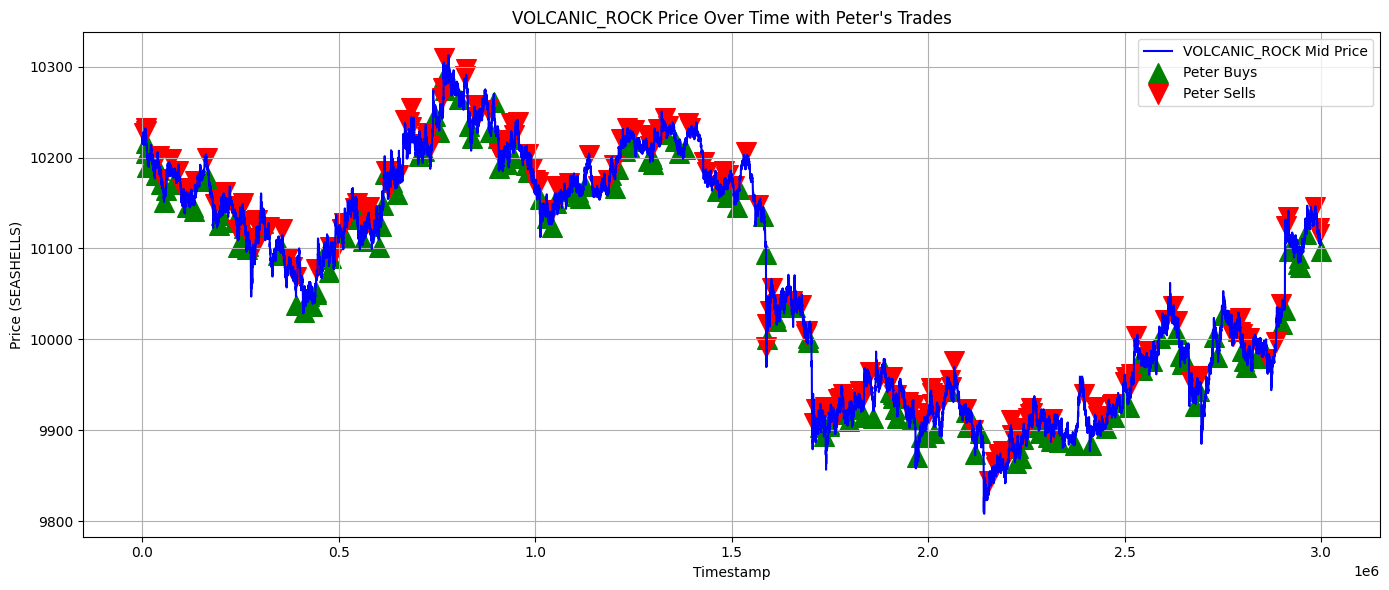

In [23]:
plot_price_with_trader_trades("VOLCANIC_ROCK", "Peter", md, th)